In [1]:
#Import Os and Basis Libraries
import cv2
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
#Matplot Images
import matplotlib.image as mpimg
# Tensflor and Keras Layer and Model and Optimize and Loss
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import *
from tensorflow.keras.losses import BinaryCrossentropy
#Kernel Intilizer 
from sklearn.preprocessing import LabelEncoder
# import tensorflow_hub as hub
from tensorflow.keras.optimizers import Adam , Adamax
#PreTrained Model
from tensorflow.keras.applications import *
#Early Stopping
from tensorflow.keras.callbacks import EarlyStopping
# Warnings Remove 
import warnings 
warnings.filterwarnings("ignore")

2025-04-28 22:20:57.620115: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745878857.797381      18 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745878857.853252      18 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Define the directory containing the "train" folder
train_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/train'

# Initialize lists to store file paths and corresponding labels
filepaths = []
labels = []

# Loop through each folder (label) in the train directory
for label_name in os.listdir(train_dir):
    label_path = os.path.join(train_dir, label_name)
    
    # Loop through each image in the label folder
    for img_name in os.listdir(label_path):
        img_path = os.path.join(label_path, img_name)
        filepaths.append(img_path)
        labels.append(label_name)

# Create a DataFrame by combining the file paths and labels
df_train = pd.DataFrame({
    'filepath': filepaths,
    'label': labels
})

In [3]:
df_train

,filepath,label
0,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
1,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
2,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
3,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
4,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
...,...,...
5211,/kaggle/input/chest-xray-pneumonia/chest_xray/...,NORMAL
5212,/kaggle/input/chest-xray-pneumonia/chest_xray/...,NORMAL
5213,/kaggle/input/chest-xray-pneumonia/chest_xray/...,NORMAL
5214,/kaggle/input/chest-xray-pneumonia/chest_xray/...,NORMAL


In [4]:
# Define the directory containing the "train" folder
test_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/test'

# Initialize lists to store file paths and corresponding labels
filepaths = []
labels = []

# Loop through each folder (label) in the train directory
for label_name in os.listdir(test_dir):
    label_path = os.path.join(test_dir, label_name)
    
    # Loop through each image in the label folder
    for img_name in os.listdir(label_path):
        img_path = os.path.join(label_path, img_name)
        filepaths.append(img_path)
        labels.append(label_name)

# Create a DataFrame by combining the file paths and labels
df_test = pd.DataFrame({
    'filepath': filepaths,
    'label': labels
})

In [5]:
df_test

,filepath,label
0,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
1,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
2,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
3,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
4,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
...,...,...
619,/kaggle/input/chest-xray-pneumonia/chest_xray/...,NORMAL
620,/kaggle/input/chest-xray-pneumonia/chest_xray/...,NORMAL
621,/kaggle/input/chest-xray-pneumonia/chest_xray/...,NORMAL
622,/kaggle/input/chest-xray-pneumonia/chest_xray/...,NORMAL


In [6]:
# Define the directory containing the "train" folder
val_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/val'

# Initialize lists to store file paths and corresponding labels
filepaths = []
labels = []

# Loop through each folder (label) in the train directory
for label_name in os.listdir(val_dir):
    label_path = os.path.join(val_dir, label_name)
    
    # Loop through each image in the label folder
    for img_name in os.listdir(label_path):
        img_path = os.path.join(label_path, img_name)
        filepaths.append(img_path)
        labels.append(label_name)

# Create a DataFrame by combining the file paths and labels
df_val = pd.DataFrame({
    'filepath': filepaths,
    'label': labels
})

In [7]:
df_val

,filepath,label
0,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
1,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
2,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
3,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
4,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
5,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
6,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
7,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
8,/kaggle/input/chest-xray-pneumonia/chest_xray/...,NORMAL
9,/kaggle/input/chest-xray-pneumonia/chest_xray/...,NORMAL


In [8]:
# Shape
print(f"The shape of The Train data is: {df_train.shape}")
print(f"The shape of The Test data is: {df_test.shape}")
print(f"The shape of The Validation data is: {df_val.shape}")

The shape of The Train data is: (5216, 2)
The shape of The Test data is: (624, 2)
The shape of The Validation data is: (16, 2)


In [9]:
# Define paths
train_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/train'
val_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/val'
test_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/test'

# Set image size and batch size
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 123

# Create the training dataset
print('Training Images:')
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=train_dir,
    validation_split=0.1,
    subset='training',
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

# Create the validation dataset
print('Validation Images:')
validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory=train_dir,
    validation_split=0.1,
    subset='validation',
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

# Create the testing dataset
print('Testing Images:')
test_ds = tf.keras.utils.image_dataset_from_directory(
    directory=test_dir,
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)


Training Images:
Found 5216 files belonging to 2 classes.
Using 4695 files for training.


I0000 00:00:1745878878.074550      18 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Validation Images:
Found 5216 files belonging to 2 classes.
Using 521 files for validation.
Testing Images:
Found 624 files belonging to 2 classes.


In [10]:
# Extract labels
train_labels = train_ds.class_names
test_labels = test_ds.class_names
validation_labels = validation_ds.class_names

# Encode Labels

# Define your class labels
class_labels = ['NORMAL', 'PNEUMONIA'] 

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder on the class labels
label_encoder.fit(class_labels)

# Transform the labels for training dataset
train_labels_encoded = label_encoder.transform(train_labels)

# Transform the labels for validation dataset
validation_labels_encoded = label_encoder.transform(validation_labels)

# Transform the labels for test dataset
test_labels_encoded = label_encoder.transform(test_labels)

In [11]:
# Shape of the dataset
for image_batch, labels_batch in train_ds:
    print("Shape of X_train: ", image_batch.shape)
    print("Shape of y_train: ", labels_batch.shape)
    break

Shape of X_train:  (32, 224, 224, 3)
Shape of y_train:  (32,)


In [12]:
# Normalizing Pixel Values 

# Train Data 
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
# Val Data
validation_ds = validation_ds.map(lambda x, y: (x / 255.0, y))
# Test Data
test_ds = test_ds.map(lambda x, y: (x / 255.0, y))

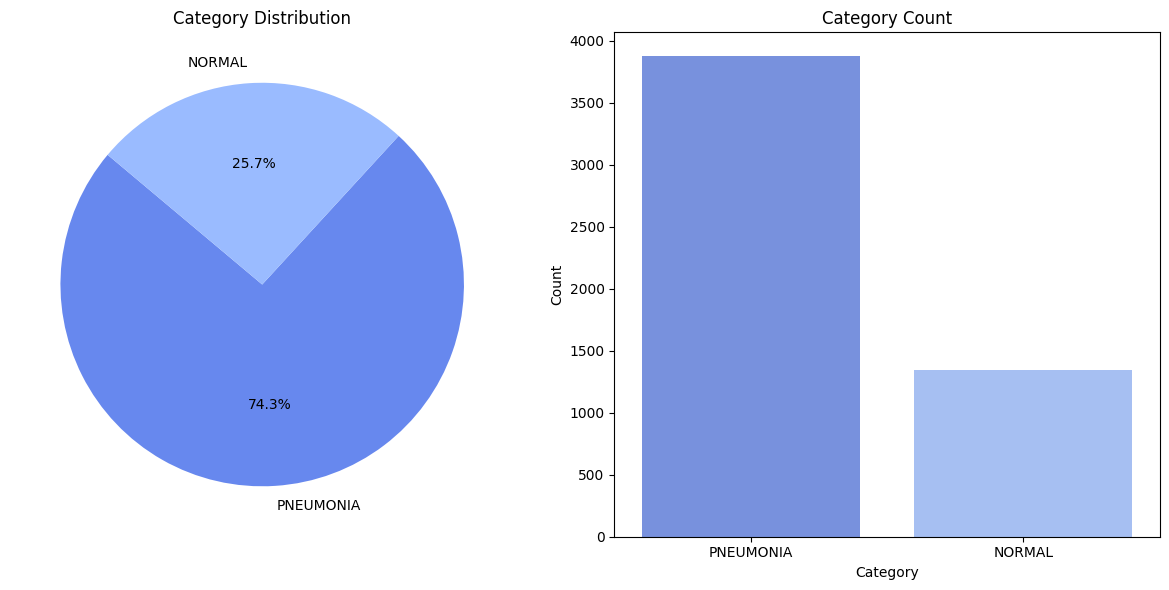

In [13]:
# Count the occurrences of each label
label_counts = df_train['label'].value_counts()

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Set the new color palette
palette = sns.color_palette("coolwarm")
sns.set_palette(palette)

# Plot the pie chart
axes[0].pie(
    label_counts,
    labels=label_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=palette
)
axes[0].set_title('Category Distribution')

# Plot the bar chart
sns.barplot(
    x=label_counts.index,
    y=label_counts.values,
    ax=axes[1],
    palette=palette
)
axes[1].set_title('Category Count')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Category')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()


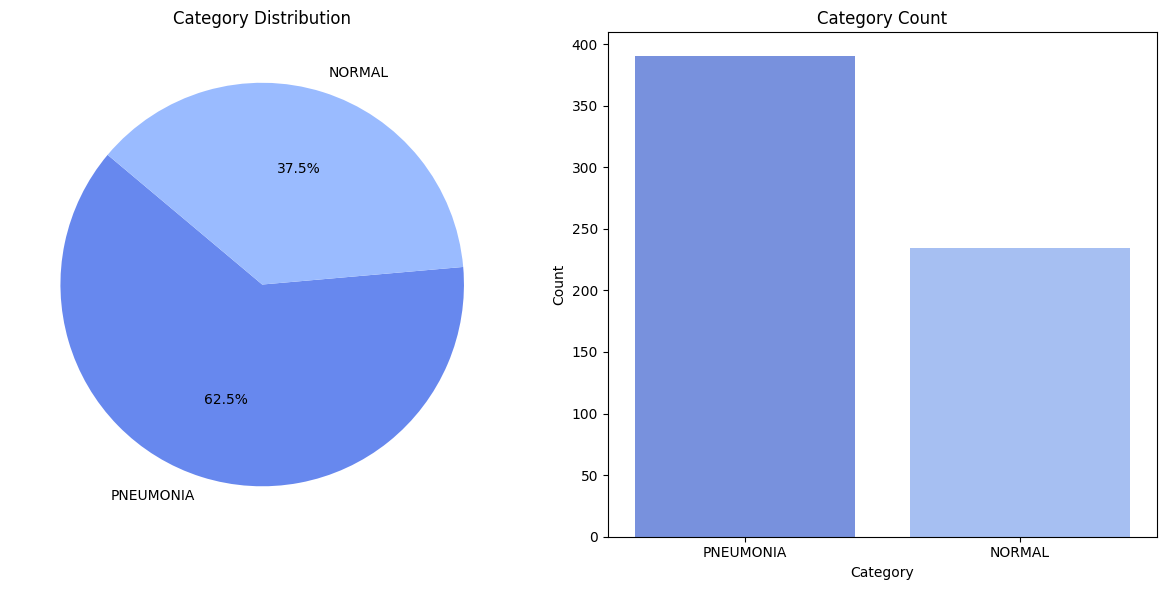

In [14]:
# Count the occurrences of each label
label_counts = df_test['label'].value_counts()

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Set the new color palette
palette = sns.color_palette("coolwarm")
sns.set_palette(palette)

# Plot the pie chart
axes[0].pie(
    label_counts,
    labels=label_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=palette
)
axes[0].set_title('Category Distribution')

# Plot the bar chart
sns.barplot(
    x=label_counts.index,
    y=label_counts.values,
    ax=axes[1],
    palette=palette
)
axes[1].set_title('Category Count')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Category')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()


In [15]:
def visualize_images(path, num_images=5):
    """
    Visualizes a set number of images from the specified directory.

    Parameters:
    - path (str): Directory containing images.
    - num_images (int): Number of images to visualize (default is 5).
    """
    # Get all image filenames in the given path
    image_filenames = os.listdir(path)
    
    # Make sure we don't exceed the number of available images
    num_images = min(num_images, len(image_filenames))
    
    # Set up the figure
    fig, axes = plt.subplots(1, num_images, figsize=(15, 4), facecolor='white')

    # If only one image, make axes iterable
    if num_images == 1:
        axes = [axes]

    # Loop through and display each image
    for idx, filename in enumerate(image_filenames[:num_images]):
        img_path = os.path.join(path, filename)
        image = mpimg.imread(img_path)
        
        axes[idx].imshow(image)
        axes[idx].axis('off')
        axes[idx].set_title(filename, fontsize=10)

    plt.tight_layout()
    plt.show()


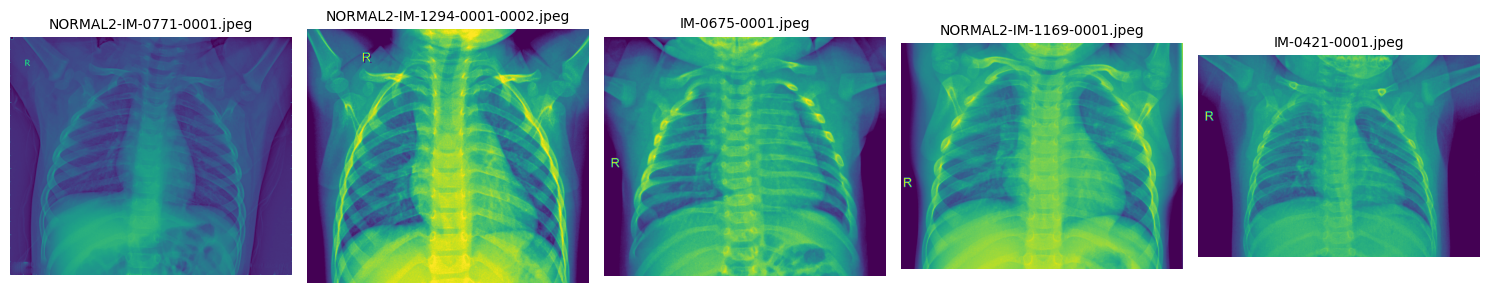

In [16]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL"

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)

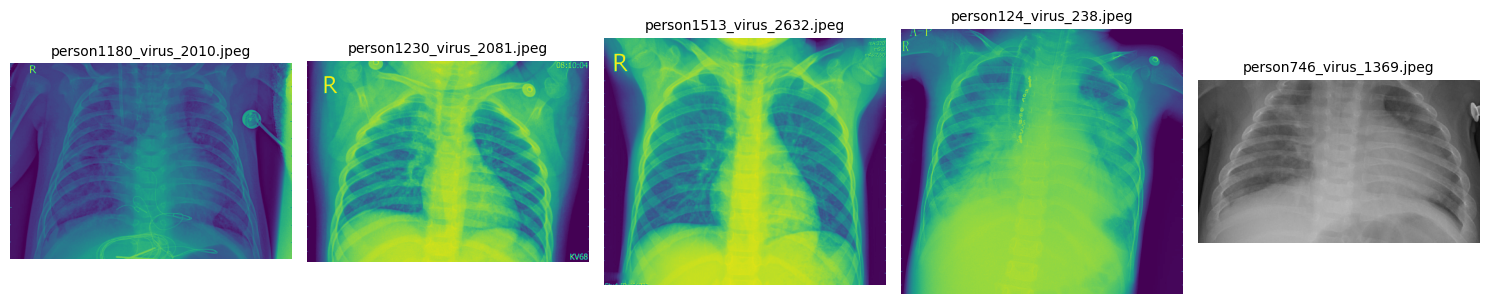

In [17]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA"

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)

In [18]:
import tensorflow as tf
from tensorflow import keras
from transformers import TFViTModel
from tensorflow.keras.layers import BatchNormalization, Dropout, Dense

# 1. Define the ViT wrapper
class ViTWrapper(keras.layers.Layer):
    def __init__(self, vit_model, **kwargs):
        super().__init__(**kwargs)
        self.vit_model = vit_model

    def call(self, inputs):
        # Convert from (batch, height, width, channels) ➔ (batch, channels, height, width)
        inputs = tf.transpose(inputs, perm=[0, 3, 1, 2])
        outputs = self.vit_model(pixel_values=inputs)
        return outputs.last_hidden_state
    
    def get_config(self):
        # Add vit_model to config dictionary
        config = super().get_config()
        config.update({
            "vit_model": self.vit_model.config.to_dict(),  # Save the configuration of the ViT model
        })
        return config

# 2. Load the Huggingface TFViTModel
base_model = TFViTModel.from_pretrained('google/vit-base-patch16-224-in21k')  # or any checkpoint you want

# Freeze the model weights
for layer in base_model.layers:
    layer.trainable = False

# 3. Define the Keras input
input_layer = keras.Input(shape=(224, 224, 3), dtype=tf.float32)

# 4. Apply ViT model using the wrapper
vit_outputs = ViTWrapper(base_model)(input_layer)

# 5. Global Average Pooling Layer
pooled_output = keras.layers.GlobalAveragePooling1D()(vit_outputs)

# 6. Create the model using the functional API
x = pooled_output

# Add Batch Normalization Layer
x = BatchNormalization()(x)

# 7. Add Dropout Layer 1
x = Dropout(0.45)(x)

# 8. Add Dense Layer 1
x = Dense(220, activation='relu')(x)

# 9. Add Dropout Layer 2
x = Dropout(0.25)(x)

# 10. Add Dense Layer 2
x = Dense(60, activation='relu')(x)

# 11. Add the Output Layer (Sigmoid for binary classification)
output_layer = Dense(1, activation='sigmoid')(x)

# 12. Define the full Keras Model using the functional API
model = keras.Model(inputs=input_layer, outputs=output_layer)

config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFViTModel.

All the weights of TFViTModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFViTModel for predictions without further training.


In [19]:
# Compile
model.compile(optimizer=Adamax(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
# Print the model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vi_t_wrapper (ViTWrapper)            │ (None, 197, 768)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 768)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 768)                 │           3,072 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 768)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 220)                 │         169,180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 220)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 60)                  │          13,260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              61 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 185,573 (724.89 KB)

 Trainable params: 184,037 (718.89 KB)

 Non-trainable params: 1,536 (6.00 KB)

In [21]:
#Early_Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

#Fitting Model
history = model.fit(train_ds,
                        epochs= 50,
                        validation_data = validation_ds,
                        callbacks = early_stopping)

Epoch 1/50


I0000 00:00:1745878918.982625      65 service.cc:148] XLA service 0x7d07f4002eb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745878918.983227      65 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1745878921.619329      65 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/147 ━━━━━━━━━━━━━━━━━━━━ 55:00 23s/step - accuracy: 0.6875 - loss: 0.5811

I0000 00:00:1745878925.085526      65 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


147/147 ━━━━━━━━━━━━━━━━━━━━ 63s 277ms/step - accuracy: 0.8875 - loss: 0.2681 - val_accuracy: 0.9290 - val_loss: 0.4127
Epoch 2/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 29s 194ms/step - accuracy: 0.9463 - loss: 0.1379 - val_accuracy: 0.9655 - val_loss: 0.2761
Epoch 3/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 29s 193ms/step - accuracy: 0.9557 - loss: 0.1140 - val_accuracy: 0.9635 - val_loss: 0.1528
Epoch 4/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 28s 193ms/step - accuracy: 0.9579 - loss: 0.1078 - val_accuracy: 0.9655 - val_loss: 0.0975
Epoch 5/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 28s 193ms/step - accuracy: 0.9626 - loss: 0.1028 - val_accuracy: 0.9712 - val_loss: 0.0886
Epoch 6/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 28s 193ms/step - accuracy: 0.9663 - loss: 0.0914 - val_accuracy: 0.9712 - val_loss: 0.0820
Epoch 7/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 28s 193ms/step - accuracy: 0.9643 - loss: 0.0933 - val_accuracy: 0.9693 - val_loss: 0.0822
Epoch 8/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 28s 193ms/step - accuracy: 0.9728 - loss: 0.0817 - val

In [22]:
model.save('pneumonia_detection_Inception_model.keras')

In [23]:
# Evaluate the model on the validation dataset
validation_loss, validation_accuracy = model.evaluate(validation_ds)

# Print the validation loss and accuracy
print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_accuracy)

17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step - accuracy: 0.9837 - loss: 0.0371
Validation Loss: 0.057695113122463226
Validation Accuracy: 0.9788867831230164


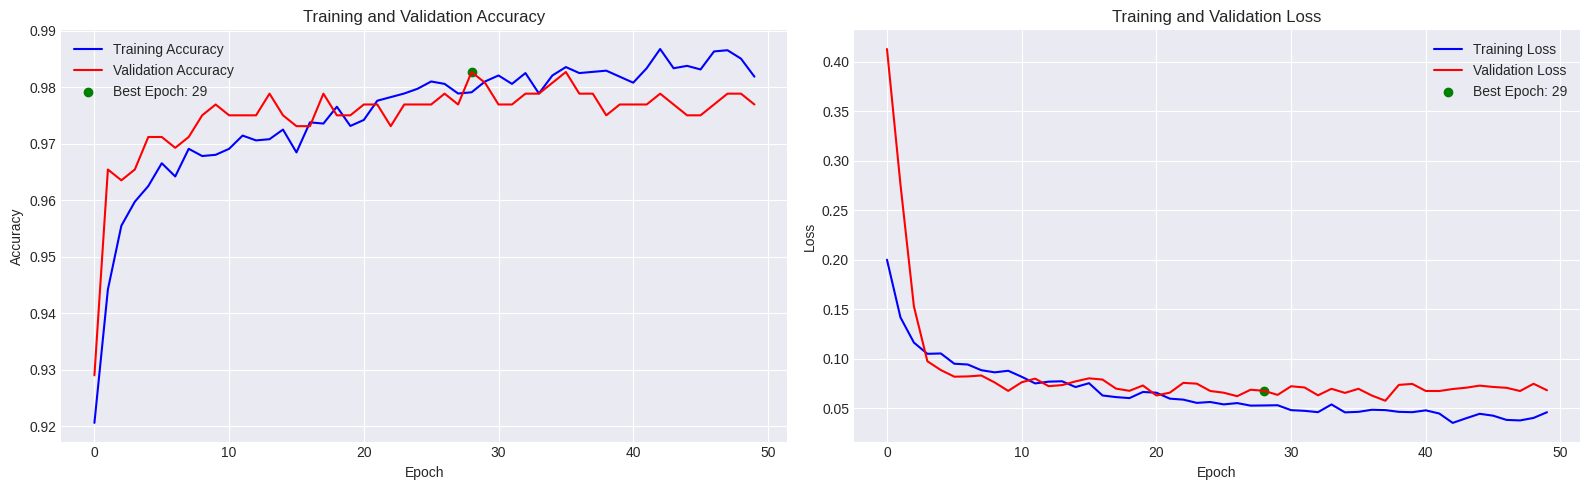

In [24]:
# Get the epoch with the highest validation accuracy
best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1

# Set the background style
plt.style.use('seaborn-darkgrid')

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plot training and validation accuracy
axs[0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
axs[0].scatter(best_epoch - 1, history.history['val_accuracy'][best_epoch - 1], color='green', label=f'Best Epoch: {best_epoch}')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()

# Plot training and validation loss
axs[1].plot(history.history['loss'], label='Training Loss', color='blue')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axs[1].scatter(best_epoch - 1, history.history['val_loss'][best_epoch - 1], color='green',label=f'Best Epoch: {best_epoch}')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


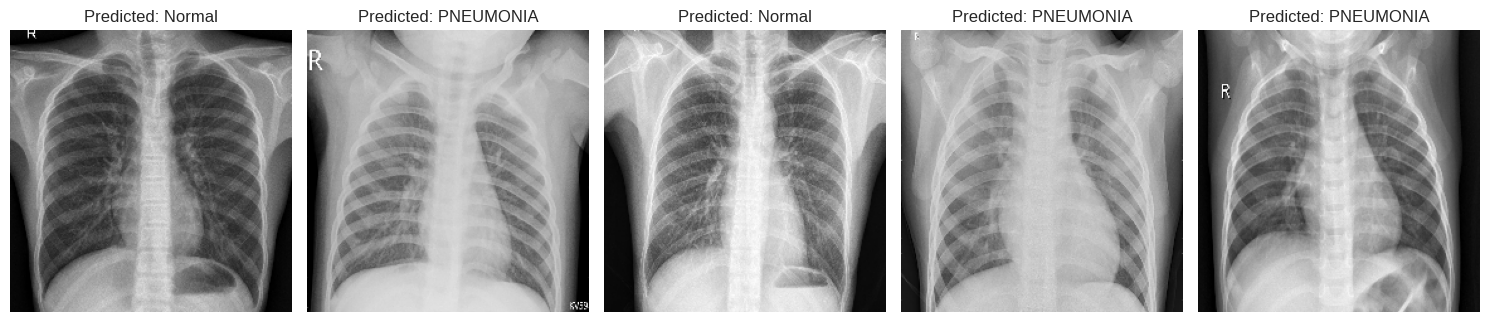

In [25]:
# Path to the directory containing the images
directory_path = '/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/'

# Select N image files from the directory
image_files = os.listdir(directory_path)[30:35]

# Create a figure and axes for subplots
fig, axs = plt.subplots(1, len(image_files), figsize=(15, 5))

# Load and preprocess each image, make predictions, and display them using a loop
for i, image_file in enumerate(image_files):
    img_path = os.path.join(directory_path, image_file)
    # Load the image using OpenCV
    img = cv2.imread(img_path)
    # Resize the image to (256, 256)
    img = cv2.resize(img, (224, 224)) 

    # Normalize pixel values
    img_array = img.astype(np.float32) / 255.0  

    # Expand the dimensions to match the input shape expected by the model
    img_array = np.expand_dims(img_array, axis=0)
    
     # Make predictions
    predictions = model.predict(img_array)
    actual_prediction = (predictions > 0.5).astype(int)
    
    # Display the image with predicted label
    # Convert BGR to RGB for displaying with matplotlib
    axs[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  
    axs[i].axis('off')
    if actual_prediction[0][0] == 0:
        predicted_label = 'Normal'
    else:
        predicted_label = 'PNEUMONIA'
    axs[i].set_title(f'Predicted: {predicted_label}')

# Adjust layout
plt.tight_layout()
plt.show()
